# notebooks/eda-creditcard.ipynb
# Exploratory Data Analysis - Anonymized Credit Card Fraud Dataset
## Adey Innovations Inc. – 10 Academy Week 5&6 Fraud Detection Challenge
**Author:** Bereket Feleke  
**Date:** 23 December 2025

### 1. Introduction

This notebook performs EDA on the **anonymized credit card dataset** (`creditcard.csv`) — the second dataset in Task 1.

**Features**:
- `Time`: Seconds from first transaction
- `Amount`: Transaction amount
- `V1`–`V28`: PCA-transformed features (anonymized for privacy)
- `Class`: 1 = fraud, 0 = legitimate
  
**Goal**: Confirm imbalance, analyze Amount/Time, explore V features.


In [1]:
### 2. Setup
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)
print("Setup complete!")

Setup complete!


3. Load Data

In [5]:
df = pd.read_csv("../data/raw/creditcard.csv")
print(f"Shape: {df.shape}")
df.head()

Shape: (284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Fraud rate: 0.173% (492 fraud cases)


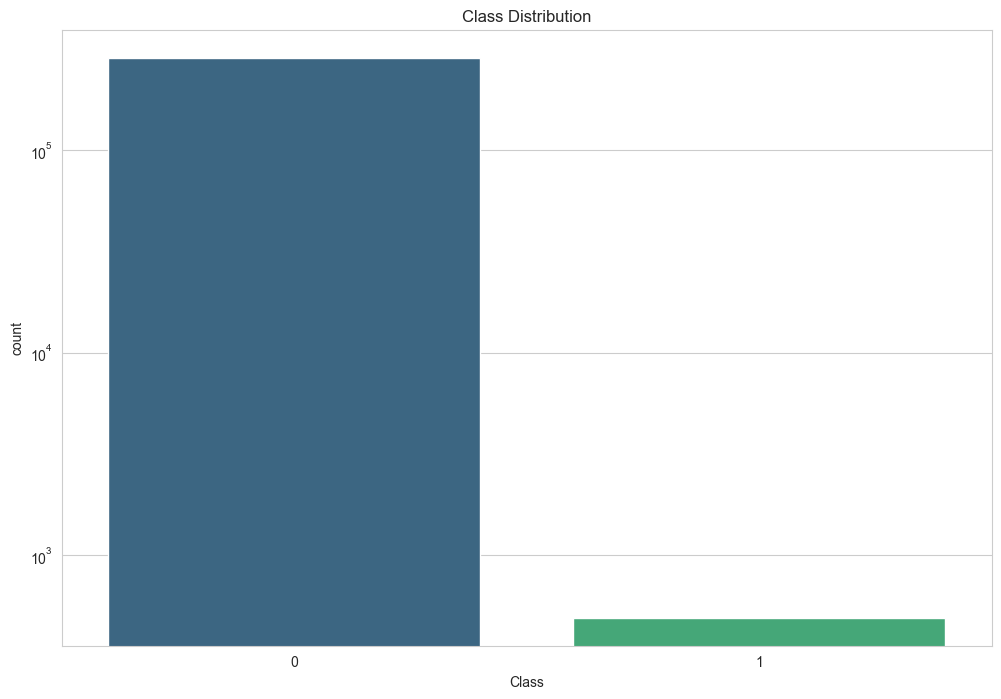

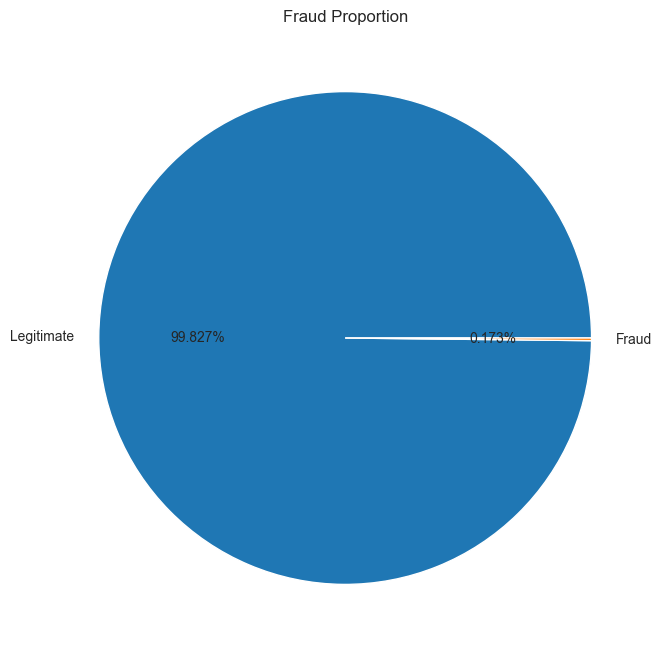

In [6]:
fraud_rate = df['Class'].mean() * 100
print(f"Fraud rate: {fraud_rate:.3f}% ({df['Class'].sum()} fraud cases)")

plt.figure()
sns.countplot(x='Class', data=df, palette='viridis')
plt.title('Class Distribution')
plt.yscale('log')
plt.show()

plt.figure()
plt.pie(df['Class'].value_counts(), labels=['Legitimate', 'Fraud'], autopct='%1.3f%%')
plt.title('Fraud Proportion')
plt.show()

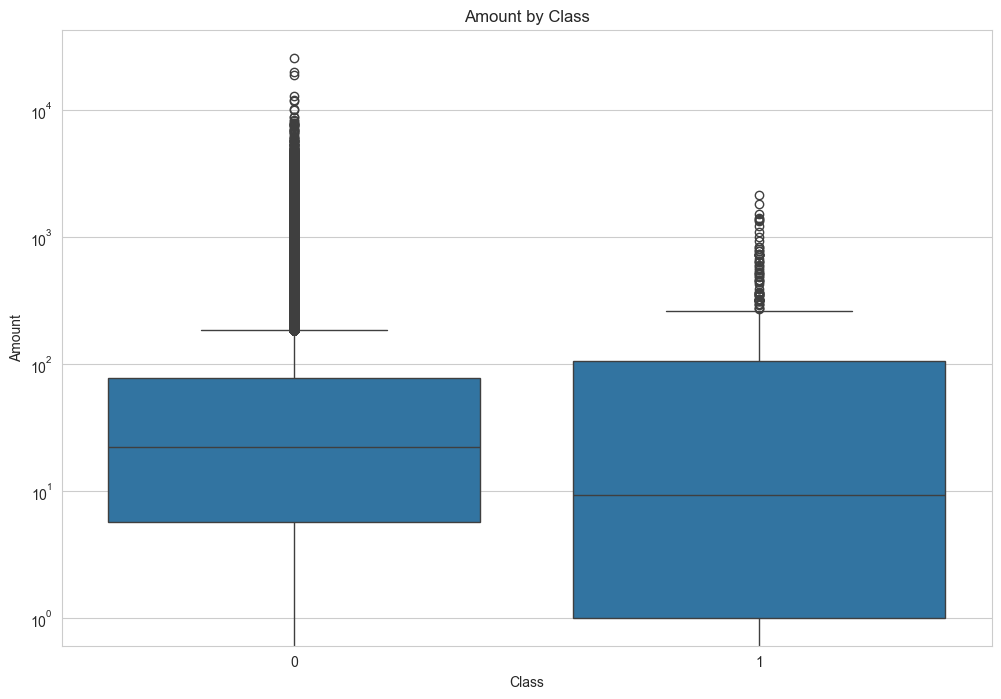

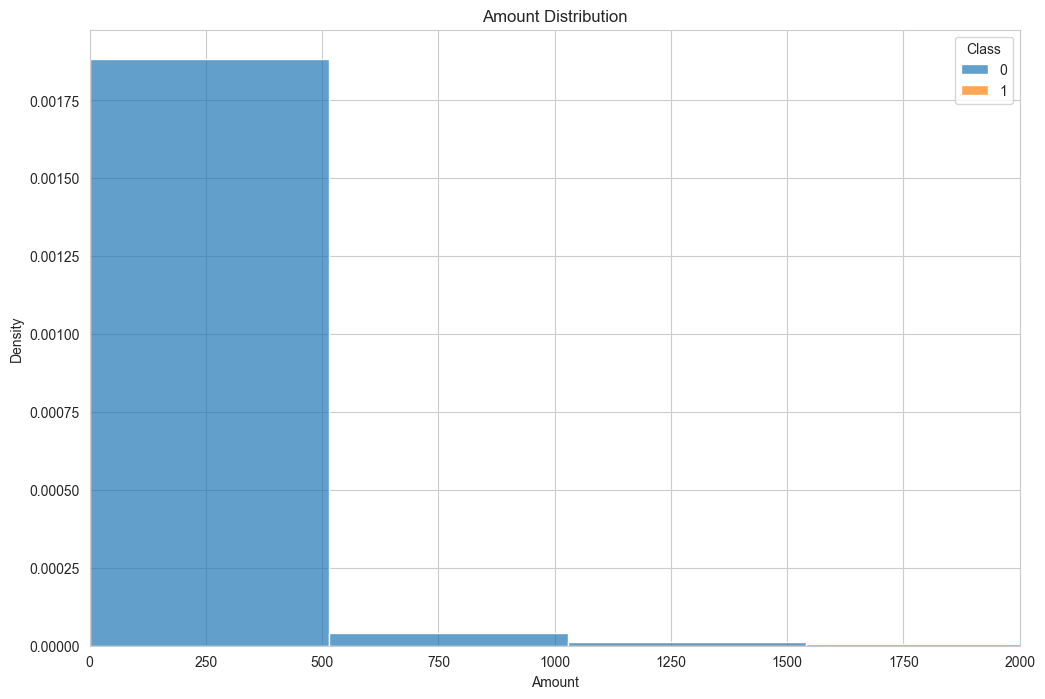

In [7]:
plt.figure()
sns.boxplot(x='Class', y='Amount', data=df)
plt.title('Amount by Class')
plt.yscale('log')
plt.show()

plt.figure()
sns.histplot(data=df, x='Amount', hue='Class', bins=50, alpha=0.7, stat='density')
plt.title('Amount Distribution')
plt.xlim(0, 2000)
plt.show()

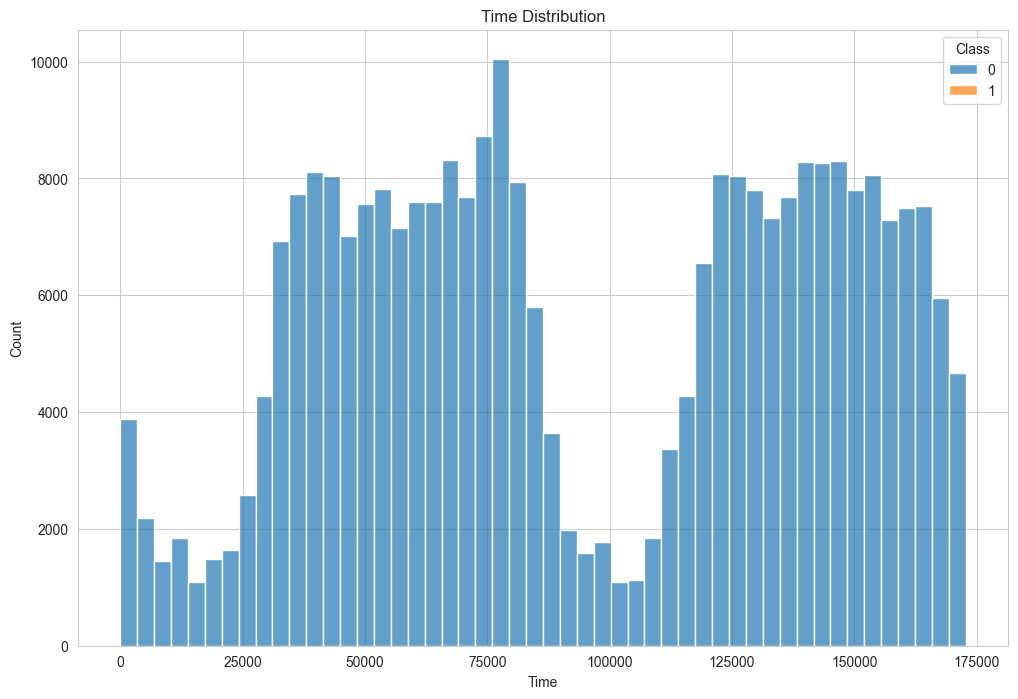

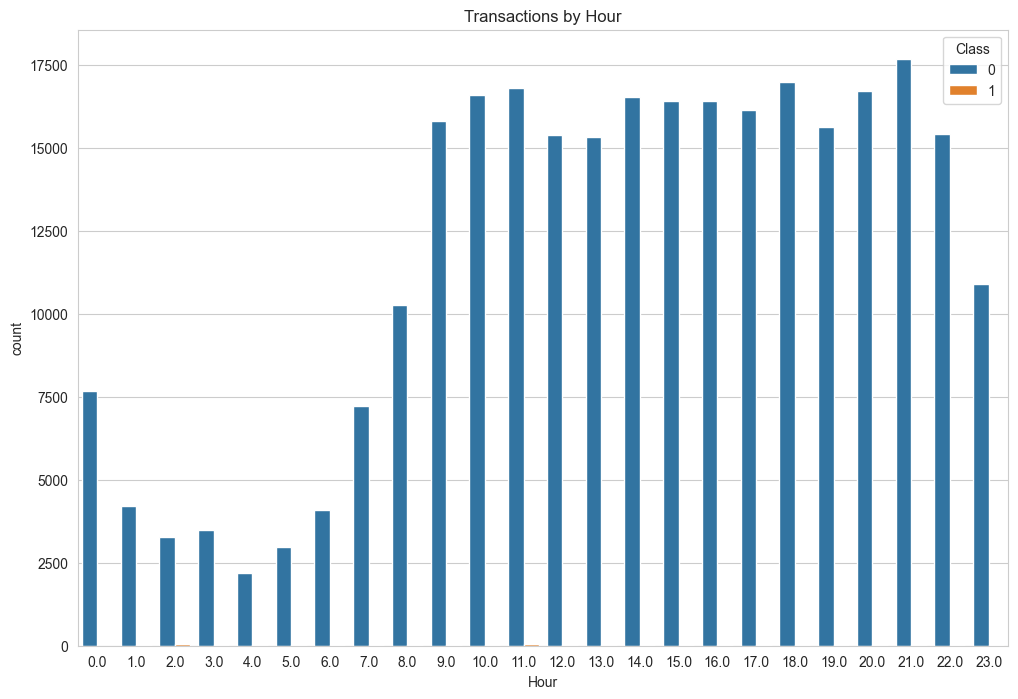

In [8]:
plt.figure()
sns.histplot(data=df, x='Time', hue='Class', bins=50, alpha=0.7)
plt.title('Time Distribution')
plt.show()

# Hour of day (assuming 48-hour period)
df['Hour'] = (df['Time'] % (24*3600)) // 3600
plt.figure()
sns.countplot(x='Hour', hue='Class', data=df)
plt.title('Transactions by Hour')
plt.show()

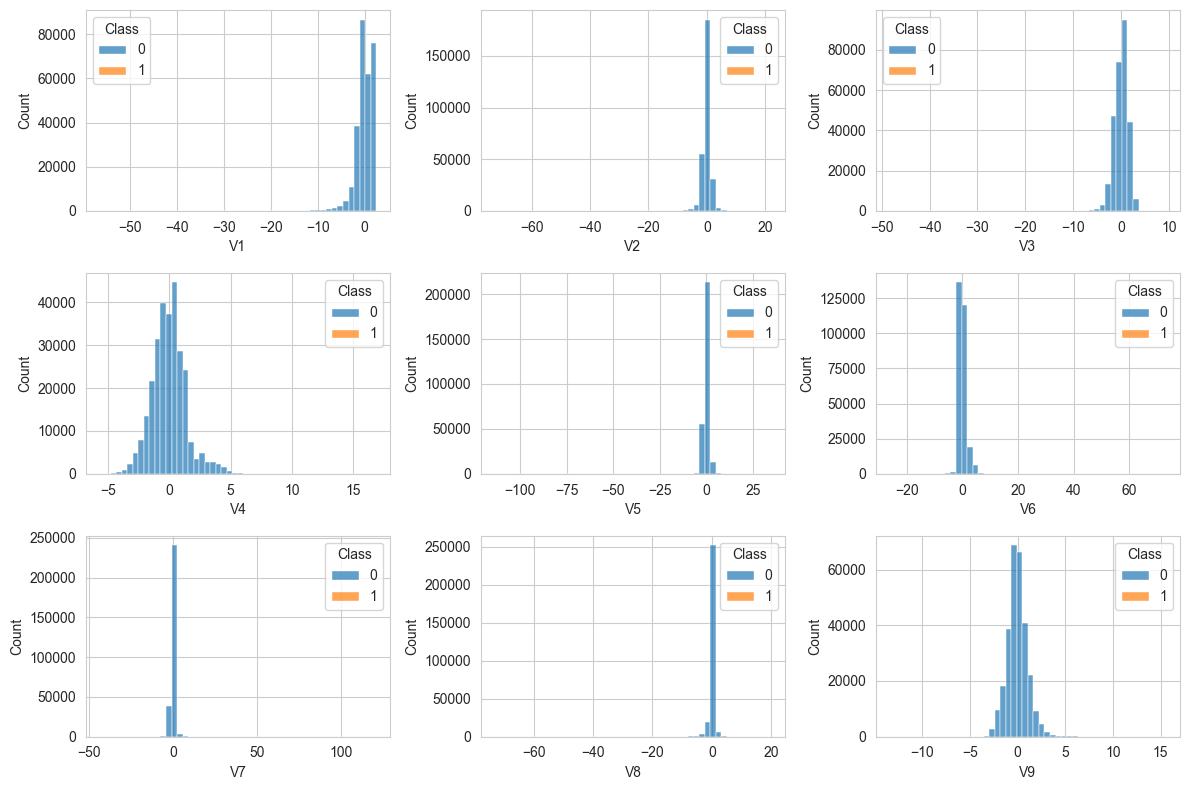

In [9]:
v_cols = [f'V{i}' for i in range(1, 29)]
sample = v_cols[:9]

fig, axes = plt.subplots(3, 3)
for i, col in enumerate(sample):
    sns.histplot(data=df, x=col, hue='Class', ax=axes[i//3, i%3], alpha=0.7, bins=50)
plt.tight_layout()
plt.show()

8. Summary

Extreme imbalance confirmed
Fraud prefers low amounts and specific times
V features highly discriminativev


**Save as `notebooks/eda-creditcard.ipynb`**

**Commit & Push to Your Task Branch**
```bash
git add notebooks/eda-creditcard.ipynb
git commit -m "Add complete EDA for creditcard.csv dataset"
git push origin task1-preprocessing